- discrete
    - binomial test
    - Chi-square test
    -------------------------------
- data set 1개
    - One-sample z-test
    - One-sample t-test
    -------------------------------
- data set 2개
    - Independent-two-sample t-test
    - Paired-two-sample t-test
    -------------------------------
- variance
    - Chi squared variance test
    - Equal-variance test
    -------------------------------
    - Normality test

# 1. 이항검정(Binomial test)
- Bern 분포 모수 $\mu\$에 대한 가설 조사
- 통계량: Bern 분포 표본의 합 ~ 이항분포를 따름

#### 연습1: 100번 던졌는데, 앞면이 46번. $\mu$ = 1/2인가?

In [177]:
np.random.seed(7)

In [245]:
N = 100
mu_0 = 1/2
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n, sp.stats.binom_test(n, N)

(46, 0.4841184136072908)

#### 연습2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [424]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [428]:
df1 = tips.groupby(['sex', 'time', 'smoker']).size().reset_index()
df2 = df1[df1['sex']=='Female'][df1['time']=='Dinner']
Smoke, Non = df2[0].values[0], df2[0].values[1]
Smoke, Non

(23, 29)

In [427]:
sp.stats.binom_test(Non, Smoke+Non)

0.4884556693798922

#### 연습3. 데이터 조사 결과: 0.7 찬성, 1% 수준으로 국민 2/3이 이상이 찬성한다고 말하려면, 표본 몇명?

In [494]:
mu_0 = 2/3
x = range(1300, 1400)
y = [sp.stats.binom_test(0.7 * N, N, mu_0) for N in x]

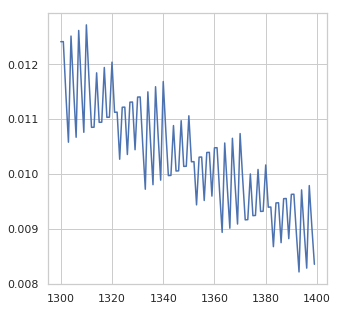

In [493]:
%matplotlib inline
f, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y)
plt.show()

# 2. 카이 제곱 검정(Chi-square test) 
## - 활용2가지
- 활용
    - 카테고리 분포의 모수 $\mu = (\mu_1, \ldots, \mu_k)$에 대한 가설 조사
    - 카테고리 확률변수 X, Y가 독립인지, 상관관계를 가지는지 검증



##### 1) 카테고리 분포의 모수 $\mu = (\mu_1, \ldots, \mu_k)$에 대한 가설 조사
- 통계량: 카테고리 분포 표본의 합(X)
- 통계량: 카이 제곱 검정의 검정 통계량
### $$\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{(m_k)}$$
$$x_k:\;카테고리\;원소\;k가\;나온\;횟수 \;\; m_k: \; 나와야 \;할\; 횟수의 \;기댓값$$

연습1. N=10회 시행시, 1,2,3,4가 아래와 같이 나왔을 때, $\mu$=(0.25,0.25,0.25,0.25)일까?

In [508]:
N = 10
K = 4
mu_0 = np.ones(K)/K
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=4)
n

array([6, 1, 1, 2])

In [509]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=6.800000000000001, pvalue=0.07855315983679816)

연습2. 4면체 주사위 3번시행. 3번 모두 1. 공정?

In [510]:
N = 3
K = 4
y = np.array([3,0,0,0])
sp.stats.chisquare(y)

Power_divergenceResult(statistic=9.0, pvalue=0.02929088653488826)

#### 2) 카테고리 확률변수 X, Y가 독립인지, 상관관계를 가지는지 검증
- data 결과 표본을 보니 독립처럼 생김, 또는 독립에 가까움.  
- 이것이 우연인지 아니면 실제 분포가 독립이라서 그러한지 확인.
- recap) X, Y가 독립이라면, X=0 or 1의 경우 모두 Y는 같은 확률분포를 보여야 함
- $H_0$ = 독립

연습1

In [528]:
obs = np.array([[5, 15], [10, 20]])
chi2, Pvalue, dof, expected = sp.stats.chi2_contingency(obs)
print(' statistics: {}\n p-value: {}\n degree of freedom: {}\n 독립이라면 마땅히:\n {}'.format(chi2, Pvalue, dof, expected))

 statistics: 0.0992063492063492
 p-value: 0.7527841326498471
 degree of freedom: 1
 독립이라면 마땅히:
 [[ 6. 14.]
 [ 9. 21.]]


In [531]:
obs = np.array([[4, 16, 20], [23, 18, 19]])
sp.stats.chi2_contingency(obs)

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

In [536]:
tips = sns.load_dataset("tips")
df = tips.pivot_table(index='sex', columns='day', aggfunc='size')
obs = df.values
sp.stats.chi2_contingency(obs)

(13.22200137240661,
 0.004180302092822257,
 3,
 array([[39.89344262, 12.22540984, 55.9795082 , 48.90163934],
        [22.10655738,  6.77459016, 31.0204918 , 27.09836066]]))

# 3. 단일표본 z-검정(One-sample z-test)
- 분산 $\sigma^2$ 정확히 알고 있는 정규분포의 표본에 대한 $\mu$ 조사.
- 안중요

연습

In [539]:
N = 10
mu_0 = 0
x = sp.stats.norm(mu_0).rvs(N)

In [540]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.5561971107503805, 0.01058231551547634)

# 4. 단일 표본 t-검정(One-sample t-test)
- **정규 분포의 sample**에 대해 $\mu$ 조사
- 검정통계량: t-통계량(~ 스튜던트 t분포 따름)
### $$
\dfrac{\bar{x} - \mu_0}{\frac{s}{\sqrt{N}}}
$$

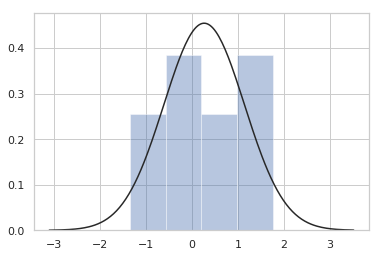

In [546]:
N = 10
mu_0 = 0
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [552]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.9099101051395859, pvalue=0.3865894613543809)

# 5. 독립 표본 t-검정(Independent-two-sample t-test)
- data set 2개
- **$\mu_1, \mu_2$ 동일한지 검사**
- 등분산 검정 사용(equal-variance test)
    - 분산 같다면 equal_var=True(default)
    - 분산 다르면 equal_var=False
- 검정통계량
    - $\sigma_1^2 = \sigma_2^2$
$$ 
t = \dfrac{\bar{x}_1 - \bar{x}_2}{s \cdot \sqrt{\dfrac{1}{N_1}+\dfrac{1}{N_2}}}
$$
$$
s = \sqrt{\dfrac{\left(N_1-1\right)s_{1}^2+\left(N_2-1\right)s_{2}^2}{N_1+N_2-2}}
$$
    - $\sigma_1^2 \neq \sigma_2^2$
$$
t = \dfrac{\bar{x}_1 - \bar{x}_2}{\sqrt{\dfrac{s_1^2}{N_1} + \dfrac{s_2^2}{N_2}}}
$$

연습

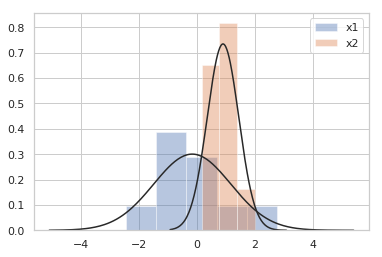

(-0.15287943022324907, 0.9061824270214561)

In [589]:
N_1, N_2 = 10, 10
mu_1, mu_2 = 0, 0.5
sigma_1, sigma_2 = 1, 1

x1 = sp.stats.norm(mu_1).rvs(N_1)
x2 = sp.stats.norm(mu_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm, label='x1')
sns.distplot(x2, kde=False, fit=sp.stats.norm, label='x2')
plt.legend()
plt.show()
np.mean(x1), np.mean(x2)

In [564]:
sp.stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-0.8689413891008084, pvalue=0.3963180265914754)

연습2. 1반 실력이 더 좋은가?(원래는 평균이 같은데, 지금 표본의 평균차이는 우연아닌가?)
- A반 성적: 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점. 평균 74.1점
- B반 성적: 80점, 85점, 70점, 80점, 35점, 55점, 80점 . 평균 69.2점    

In [594]:
def point(a):
    """
    type(a)=str
    """    
    lsa = a.replace('점','').split(',')
    a_point = [int(x.strip()) for x in lsa]
    return np.array(a_point)

A_point = point('80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점')
B_point = point('80점, 85점, 70점, 80점, 35점, 55점, 80점')
sp.stats.ttest_ind(A_point, B_point)

#결론: 실력차 없음

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

# 6. 대응 표본 t-검정(paired-two-sample t-test)
- two sample t-test에서, 두 집단의 표본이 1:1 대응할 때 사용
- data set 2개, 각 $\mu$ 값 동일한지 여부 판단
- 통계량(대응하는 표본값 차이$x_d = x_{1i} - x_{2i}$)

### $$
t = \dfrac{\bar{x_d} - \mu_0}{\dfrac{s_d}{\sqrt{N}}}
$$

연습. 기댓값 바뀐 집단 맞추는지 확인(원래 점수 vs 평균 점수가 올랐을 때)

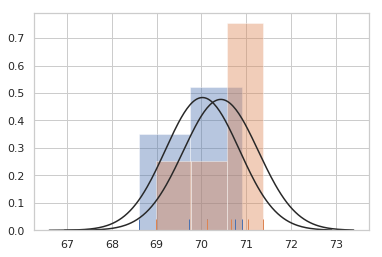

Ttest_relResult(statistic=-9.425982677576469, pvalue=0.0007062215689690718)

In [653]:
N = 5
mu_1, mu_2 = 70, 0.4
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

sns.distplot(x1, kde=False, rug= True, fit=sp.stats.norm)
sns.distplot(x2, kde=False, rug= True, fit=sp.stats.norm)
plt.show()
sp.stats.ttest_rel(x1, x2)

# 분산 
# 1. 카이 제곱 분산 검정(Chi-Square Test for the Variance): 안중요
- data set 1개
- 의미없음: 분산검정은 용처가 없음
- 원리: 정규분포의 표본분산$s^2$ -> 정규화 -> 카이제곱분포 따름
$$
\chi^2 = (N-1)\dfrac{s^2}{\sigma_0^2}
$$

연습. sample분산을 통해 $\sigma^2=1$인지 검정

In [684]:
def chi2var_test(x, sigma2=1):
    v = x.var(ddof=1)
    t = (len(x) - 1)*v/sigma2
    return t, sp.stats.chi2(df=len(x)-1).sf(np.abs(t))

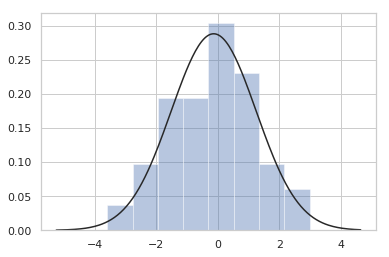

1.383478349135908

In [685]:
N = 100
mu_0 = 0
sigma_0 = 1.5
x = sp.stats.norm(mu_0, sigma_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()
x.std()

In [686]:
chi2var_test(x)

(191.4012342527817, 7.456155930377351e-08)

# 2. 등분산 검정(Equal-variance test)
- Data set 2개, 두 정규 분포의 $\sigma^2$이 같은지 확인
- 검정통계량: 표본분산의 비율
- 검정통계량은 표본분산의 비율을 따름
$$
F = \frac{s_1^2}{s_2^2}
$$
- 실제 검정통계량: `bartlett`, `fligner`, `levene`

연습

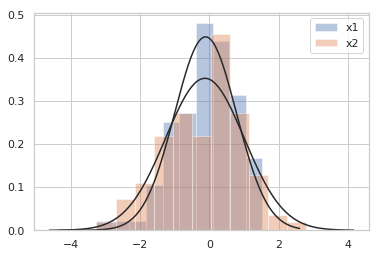

In [690]:
N1, N2 = 100, 100
sigma_1, sigma_2 = 1, 1.2
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)

sns.distplot(x1, kde=False, fit=sp.stats.norm, label='x1')
sns.distplot(x2, kde=False, fit=sp.stats.norm, label='x2')
plt.legend()
plt.show()


In [694]:
bartlett = sp.stats.bartlett(x1, x2)[1]
fligner = sp.stats.fligner(x1, x2)[1]
levene = sp.stats.levene(x1, x2)[1]

In [701]:
print("bar: {}\nfli: {}\nlev: {}".format(bartlett,fligner,levene))

bar: 0.017185692088378803
fli: 0.009919336561695444
lev: 0.009771763140111576


# 1. 정규성검정 normality test
- 회귀분석 등에서 확률분포가 가우시안 정규분포 따르는지 여부 매우 중요
- `sp.stats.ks_2samp, shapiro, anderson, normaltest`
- Kolmogorov-Smirnov 검정: 두 표본이 같은 분포 따르는지 확인

연습

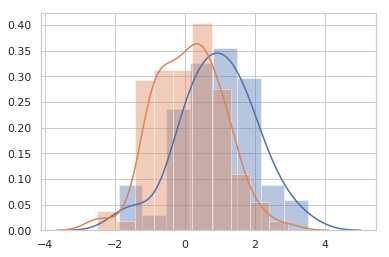

In [709]:
N1, N2 = 50, 100
x1 = sp.stats.norm(1, 1).rvs(N1)
x2 = sp.stats.norm(0, 1).rvs(N2)
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [707]:
sp.stats.ks_2samp(x1, x2)

Ks_2sampResult(statistic=0.4, pvalue=2.7715689716475727e-05)